In [1]:

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

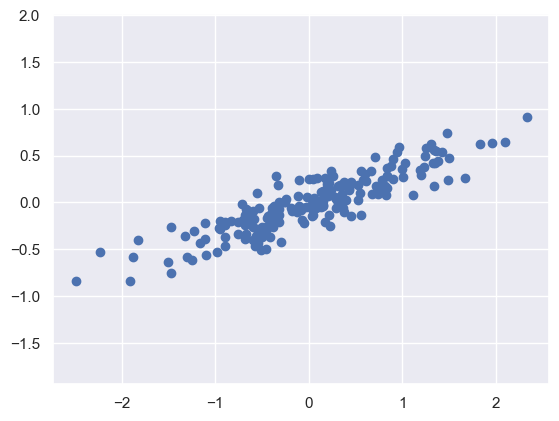

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
m = np.mean(X,axis=0)
m

array([ 0.03351168, -0.00408072])

In [4]:
#calcular media
m = np.mean(X,axis=0)
X_center = X - m
X_center.mean(axis=0)
S = np.dot(X_center.T,X_center)
S.shape

(2, 2)

In [5]:
S = np.dot(X_center.T,X_center)
S

array([[135.75334359,  45.9560144 ],
       [ 45.9560144 ,  19.6675263 ]])

In [7]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(S)
eig_val_sc, eig_vec_sc

(array([151.74376868,   3.67710121]),
 array([[ 0.94446029, -0.32862557],
        [ 0.32862557,  0.94446029]]))

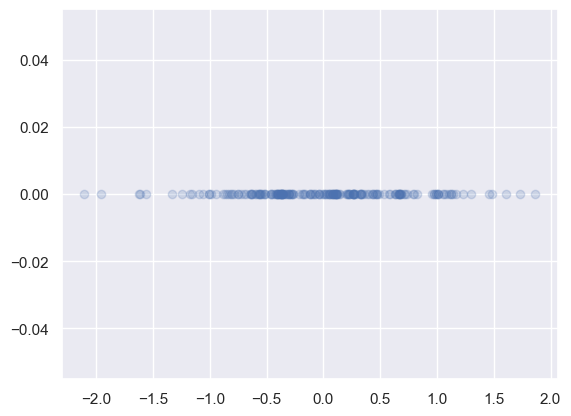

In [8]:

X_star = np.dot(X_center,eig_vec_sc[0,:].reshape(2,1))
Y = X_star *0
plt.scatter(X_star, Y, alpha=0.2)

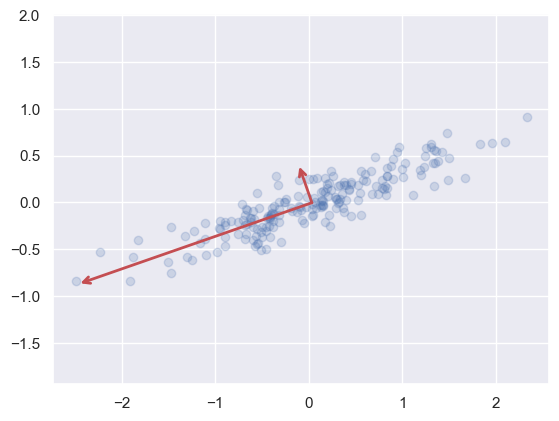

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0,
                    shrinkB=0,
                    color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [16]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)


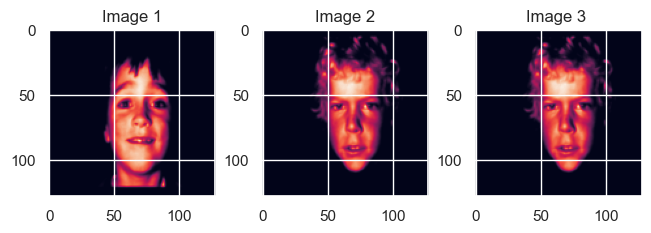

In [17]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

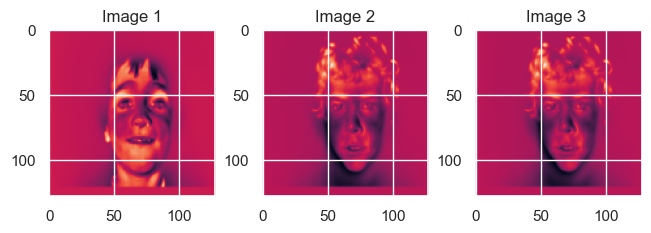

In [18]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

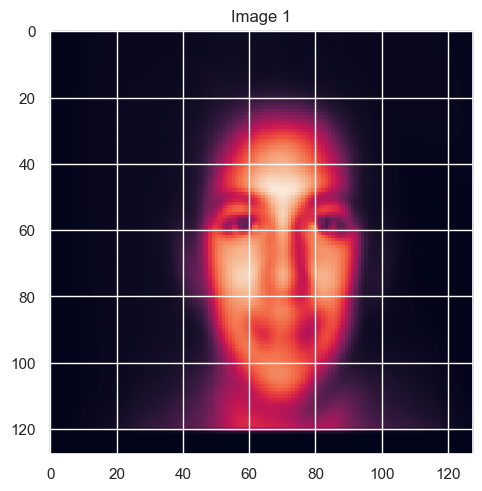

In [19]:
plot_1_images(X_mean)


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [21]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [22]:
eigen_values

array([6.96207566e+06, 1.84427867e+06, 1.53168143e+06, 1.01239408e+06,
       7.91568024e+05, 7.14082717e+05, 5.78936277e+05, 4.28224650e+05,
       3.20824396e+05, 3.02030376e+05, 2.49446242e+05, 2.37873281e+05,
       1.92096651e+05, 1.88280954e+05, 1.74892724e+05, 1.55317511e+05,
       1.46351469e+05, 1.35034656e+05, 1.26690346e+05, 1.24959959e+05,
       1.15690387e+05, 1.07323759e+05, 1.03756079e+05, 1.01245520e+05,
       9.70738695e+04, 8.77061379e+04, 8.57262235e+04, 7.98932682e+04,
       7.75748671e+04, 7.58772923e+04, 6.88788590e+04, 6.72516922e+04,
       6.46136367e+04, 6.21998793e+04, 6.14318635e+04, 5.63400791e+04,
       5.51947304e+04, 5.33946789e+04, 5.17569860e+04, 4.97314346e+04,
       4.85328028e+04, 4.56109563e+04, 4.46796956e+04, 4.31544388e+04,
       4.25852848e+04, 4.13991805e+04, 3.97617583e+04, 3.95342956e+04,
       3.83624177e+04, 3.66875402e+04, 3.61445468e+04, 3.55343386e+04,
       3.36912039e+04, 3.32464253e+04, 3.23601458e+04, 3.18935300e+04,
      

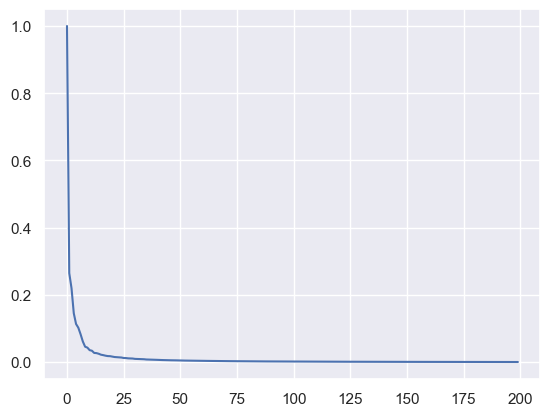

In [23]:
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

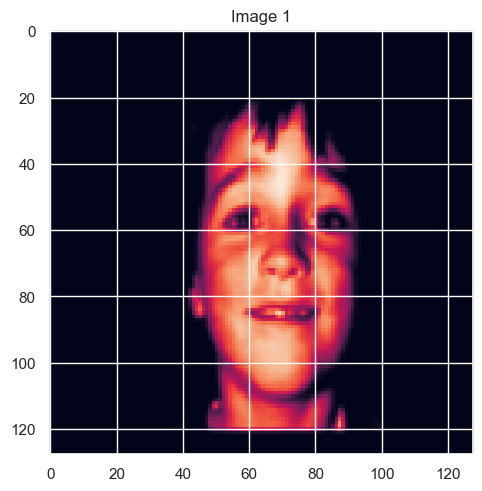

In [24]:
plot_1_images(X[1])

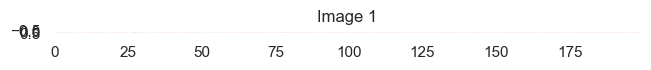

In [25]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
ax.imshow(X_reduced[1].reshape(1,-1))
ax.set_title(label="Image 1")
plt.show()


In [26]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (796, 200)
Eigenvectores (200, 16384)
[-2.27403229e-12 -8.51456551e-14 -1.17043420e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [27]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

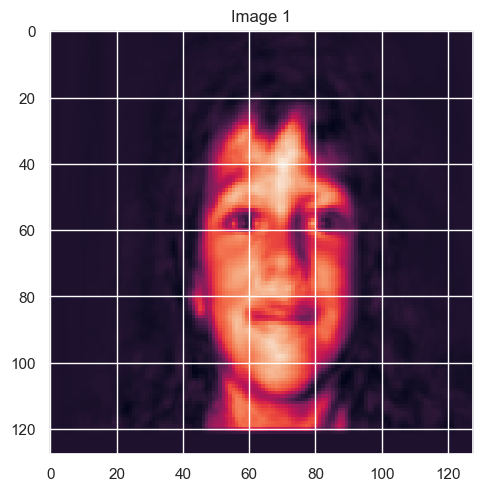

In [28]:
plot_1_images(X_mean + face_1.sum(axis=0) )

(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

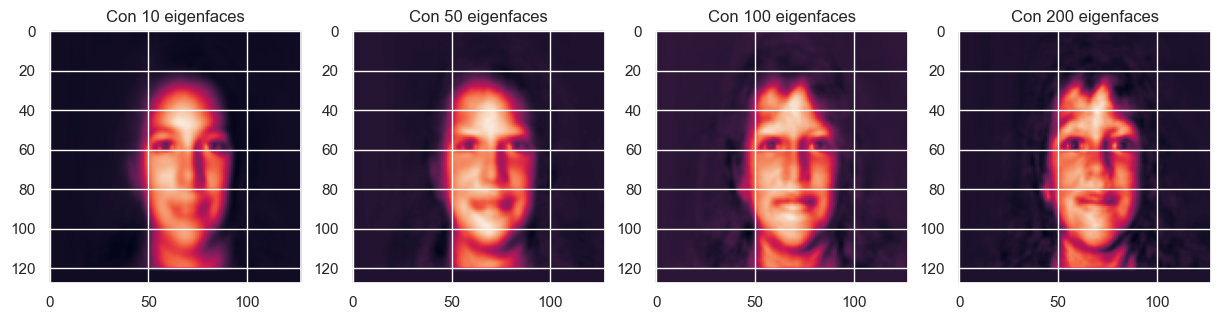

In [32]:
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                 eigen_faces[:10,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:50],
                                      eigen_faces[:50,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:100],
                                      eigen_faces[:100,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:200],
                                     eigen_faces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 10 eigenfaces")
plot_1_images(face_50,ax=ax[1],label="Con 50 eigenfaces")
plot_1_images(face_100,ax=ax[2],label="Con 100 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

In [33]:
min_dis = 100000000000000000
ix_1 = 0
ix_2 = 0
for i in range(200):
    for j in range(i+1,200):
        # excluir imagen en negro
        if np.sum(X_reduced[i])>0:
            dis_ij = sum(abs(X_reduced[i]-X_reduced[j]))
            if dis_ij < min_dis:
                min_dis = dis_ij
                ix_1 = i
                ix_2 = j
print("Imagenes similares son {0} y {1}".format(ix_1,ix_2))

Imagenes similares son 174 y 175


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

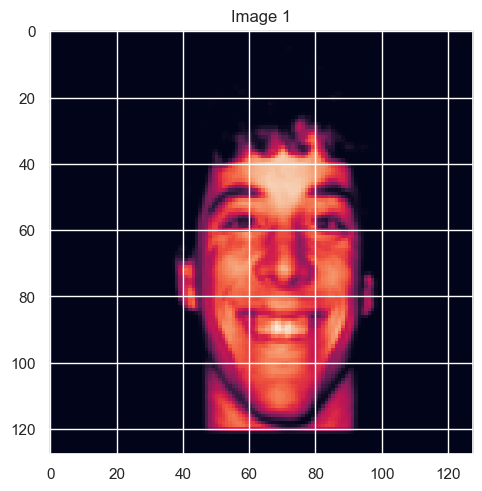

In [34]:
plot_1_images(X[ix_1])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

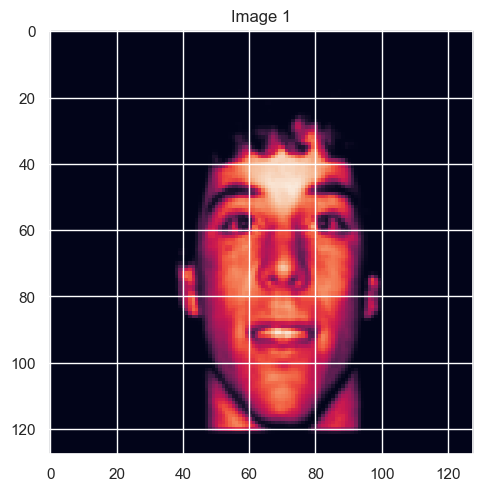

In [35]:

plot_1_images(X[ix_2])

In [42]:
import numpy as np

In [ ]:
def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

In [43]:


class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        # Inicializar los centroides aleatoriamente
        centroids = X[np.random.choice(X.shape[0], size=self.n_clusters, replace=False), :]
        
        for i in range(self.max_iter):
            # Calcular la distancia de cada punto a cada centroide
            distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
            
            # Asignar cada punto al centroide más cercano
            labels = np.argmin(distances, axis=0)
            
            # Actualizar los centroides
            for j in range(self.n_clusters):
                centroids[j] = np.mean(X[labels == j], axis=0)
        
        self.labels_ = labels
        self.cluster_centers_ = centroids
    
    def predict(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        return labels

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\smejia\scikit_learn_data


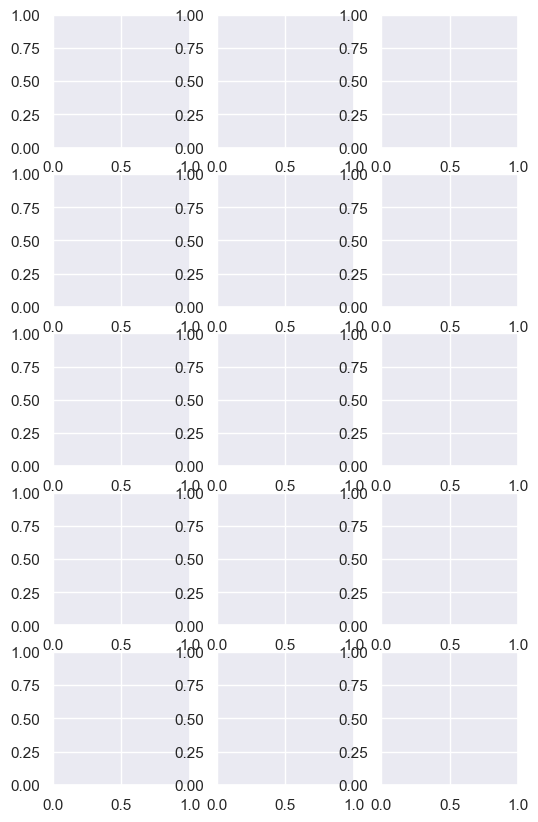

In [47]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

# Cargar los datos de las caras
faces = fetch_olivetti_faces().data

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=3)
faces_pca = pca.fit_transform(faces)

# Aplicar KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(faces_pca)

# Seleccionar las 3 caras más cercanas al centroide de cada cluster
closest_faces = []
for i in range(kmeans.n_clusters):
    cluster_faces = faces[kmeans.labels_ == i]
    cluster_faces_pca = faces_pca[kmeans.labels_ == i]
    cluster_center = kmeans.cluster_centers_[i]
    distances = np.sqrt(((cluster_faces_pca - cluster_center)**2).sum(axis=1))
    closest_indices = np.argsort(distances)[:3]
    closest_faces.append(cluster_faces[closest_indices])
    
# Mostrar las caras seleccionadas
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(6, 10))

